# Example notebook for agglomeration and breakage

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\wuyua\Projects\PycharmProjects\crm


In [2]:
from crm.presets.hypothetical import Hypothetical1D, HypotheticalAgg1D, HypotheticalBrk1D, HypotheticalAggBrk1D
from crm.solvers.mcsolver import MCSolver, MCSolverOptions
from crm.base.input import ConstantTemperatureInput
from crm.base.output_spec import OutputAllSpec
from crm.utils.pandas import StateDataFrame

In [3]:
sys_no_agg_brk = Hypothetical1D()
sys_agg_only = HypotheticalAgg1D()
sys_brk_only = HypotheticalBrk1D()
sys_agg_brk = HypotheticalAggBrk1D()

In [4]:
system_spec = sys_agg_only
initial_state = system_spec.make_state(concentration=system_spec.forms[0].solubility(t=60), temperature=25, volume=150e-6)
input_ = ConstantTemperatureInput(25.0)

options = MCSolverOptions(output_spec=OutputAllSpec())
solver = MCSolver(system_spec, options)

In [7]:
result = solver.compute(initial_state, 100, input_)

KeyboardInterrupt: 

In [10]:
sdf = StateDataFrame(result)

<AxesSubplot:>

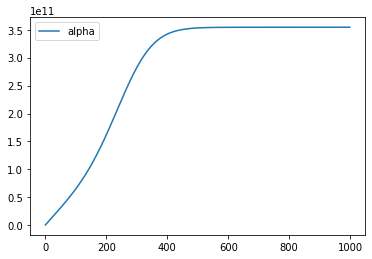

In [11]:
sdf.counts.plot()